In [ ]:
import gdown
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Download and load data
file_id = '1nokkaYBBXswLKA0erqj1JRRi-JXtO_Uj'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'Cleaned_Sleep_Data.csv', quiet=False)

df = pd.read_csv('Cleaned_Sleep_Data.csv')

Downloading...
From: https://drive.google.com/uc?id=1nokkaYBBXswLKA0erqj1JRRi-JXtO_Uj
To: /content/Cleaned_Sleep_Data.csv
100%|██████████| 1.85M/1.85M [00:00<00:00, 113MB/s]


## Session Summary

This session involved the following steps:

1. **Data Loading and Preparation**: The data was loaded and prepared for a classification task.
2. **Data Splitting**: The dataset was split into training and testing sets.
3. **Initial Model Training and Evaluation**: An initial Random Forest model was trained, and its accuracy was evaluated.
4. **Cross-Validation**: 5-fold cross-validation was performed to get a more robust estimate of the model's performance.
5. **Hyperparameter Tuning**: GridSearchCV was used to find the best hyperparameters for the Random Forest model.
6. **Final Model Training and Evaluation**: A final model was trained using the best hyperparameters found, and its accuracy was evaluated.
7. **Feature Importance**: The top 10 most important features were identified and visualized based on the final model.

In [ ]:
df.head()

,Gender,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Systolic,...,Occupation_Scientist,Occupation_Software Engineer,Occupation_Teacher,Occupation_nan,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea,MAP,Sleep Efficiency,Activity_Steps_Ratio,Stress_Sleep_Ratio
0,1,35,6.65,7,50,7,3,71,7100,120,...,0.0,0.0,0.0,0.0,0.0,0.0,93.333333,46.55,0.007042,1.000000
1,1,42,6.90,8,52,4,0,66,7000,135,...,0.0,0.0,1.0,0.0,0.0,0.0,105.000000,55.20,0.007429,0.500000
2,1,34,6.95,7,66,6,2,74,6100,126,...,0.0,1.0,0.0,0.0,0.0,0.0,97.333333,48.65,0.010820,0.857143
3,1,32,6.90,6,52,7,0,71,6500,120,...,0.0,0.0,0.0,0.0,0.0,0.0,93.333333,41.40,0.008000,1.166667
4,1,37,6.85,7,60,6,0,71,6500,125,...,0.0,0.0,0.0,0.0,0.0,0.0,95.000000,47.95,0.009231,0.857143


1. Train The model(split the data set). :Random Forest
2. Evaluate it. (accuracy)
3. Hyperparameter Tunning.
4. Cross-Validation.

 Import Libraries and Load Data

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import matplotlib.pyplot as plt
# import seaborn as sns

# # create sample data
# from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
# df = pd.DataFrame(X)
# df['target'] = y

# print("Dataset shape:", df.shape)
# print("\nFirst 5 rows:")
# print(df.head())

split the data set

In [ ]:

df = pd.read_csv('Cleaned_Sleep_Data.csv')

conditions = [
    (df['Sleep Disorder_Insomnia'] == 1),
    (df['Sleep Disorder_Sleep Apnea'] == 1)
]
choices = [1, 2]
y = np.select(conditions, choices, default=0)
X = df.drop(['Sleep Disorder_Insomnia', 'Sleep Disorder_Sleep Apnea'], axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Train the Random Forest Model

In [ ]:
# Create and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully!")

Random Forest model trained successfully!


Evaluate the model

Accuracy: 0.9663

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1000
           1       0.96      0.97      0.97      1000
           2       0.97      0.98      0.97      1000

    accuracy                           0.97      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.97      0.97      0.97      3000



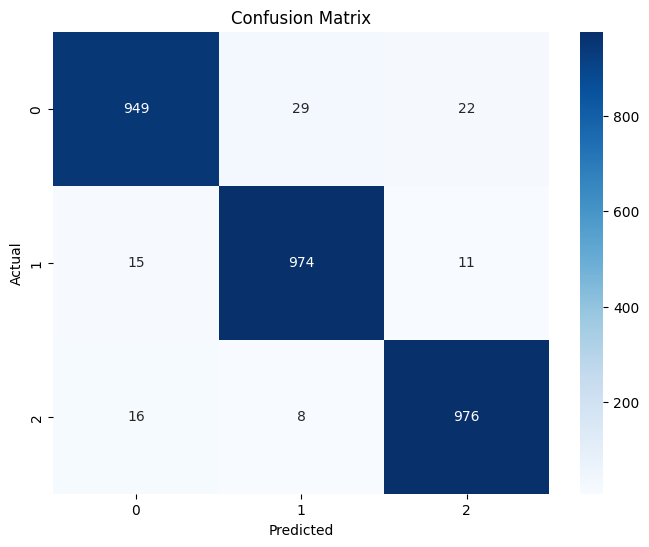

In [ ]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Detailed evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Cross-Validation.

In [ ]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print(f"Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Cross-validation with different metrics
cv_scores_precision = cross_val_score(rf_model, X, y, cv=5, scoring='precision_weighted')
cv_scores_recall = cross_val_score(rf_model, X, y, cv=5, scoring='recall_weighted')
cv_scores_f1 = cross_val_score(rf_model, X, y, cv=5, scoring='f1_weighted')

print(f"\nPrecision: {cv_scores_precision.mean():.4f}")
print(f"Recall: {cv_scores_recall.mean():.4f}")
print(f"F1-Score: {cv_scores_f1.mean():.4f}")

Cross-Validation Scores: [0.96966667 0.96233333 0.96866667 0.96766667 0.96433333]
Mean CV Accuracy: 0.9665 (+/- 0.0055)

Precision: 0.9666
Recall: 0.9665
F1-Score: 0.9665


Hyperparameter Tunning.

In [ ]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

In [ ]:
# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available cores
    verbose=1
)

In [ ]:
# Perform grid search
print("Starting hyperparameter tuning...")
grid_search.fit(X_train, y_train)

Starting hyperparameter tuning...
Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=1)

In [ ]:
# Best parameters and score
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")


Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation score: 0.9664


Train Final Model

Final Model Accuracy: 0.9667
Improvement: 0.0003

Top 10 Most Important Features:
                    feature  importance
10                Diastolic    0.157724
9                  Systolic    0.130659
21                      MAP    0.095572
1                       Age    0.074984
4   Physical Activity Level    0.072956
6              BMI Category    0.070234
8               Daily Steps    0.069992
2            Sleep Duration    0.066108
22         Sleep Efficiency    0.056013
23     Activity_Steps_Ratio    0.050194


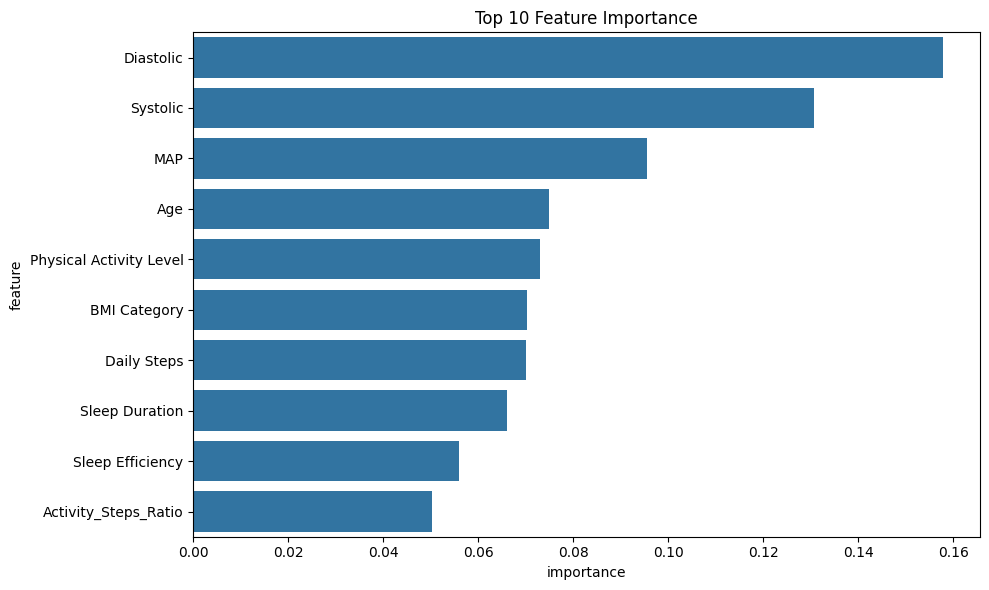

In [ ]:
# Train final model with best parameters
best_rf_model = grid_search.best_estimator_

# Evaluate final model
y_pred_best = best_rf_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_pred_best)

print(f"Final Model Accuracy: {final_accuracy:.4f}")
print(f"Improvement: {final_accuracy - accuracy:.4f}")



# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))



# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Feature Importance')
plt.tight_layout()
plt.show()

Final summary

In [ ]:
# Final summary
print("=" * 50)
print("RANDOM FOREST COMPLETE PIPELINE SUMMARY")
print("=" * 50)
print(f"1. Dataset Size: {df.shape}")
print(f"2. Train/Test Split: {X_train.shape[0]}/{X_test.shape[0]}")
print(f"3. Initial Model Accuracy: {accuracy:.4f}")
print(f"4. Cross-Validation Mean Accuracy: {cv_scores.mean():.4f}")
print(f"5. Best Parameters: {grid_search.best_params_}")
print(f"6. Final Model Accuracy: {final_accuracy:.4f}")
print(f"7. Accuracy Improvement: {final_accuracy - accuracy:.4f}")

RANDOM FOREST COMPLETE PIPELINE SUMMARY
1. Dataset Size: (15000, 27)
2. Train/Test Split: 12000/3000
3. Initial Model Accuracy: 0.9663
4. Cross-Validation Mean Accuracy: 0.9665
5. Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
6. Final Model Accuracy: 0.9667
7. Accuracy Improvement: 0.0003
